## Observations and Insights 

In [2]:
# DEEP PATEL - Pymaceuticals - 7/2020

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

#combined_data["Mouse ID"].count() #to find out initial rows for use in determining duplicates

a=combined_data["Mouse ID"].nunique() #initial mice count

print("The number of mice in the intial dataframe is " + str(a))

The number of mice in the intial dataframe is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

DuplicateRows = combined_data[combined_data.duplicated()] #easy answer ONLY THE ROWS THATS DUPED

duplicatedata = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicatedata

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

a = combined_data.loc[combined_data["Mouse ID"] == "g989"]

#OR

DuplicateRows #This give us just the row that was duplicated
a #ALL DATA for Mouse ID = g989 which is the duplicated mouse. This was asked to be dropped in the next steps. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

##SAVE THIS##  revised_combined_data=combined_data.drop_duplicates()  

revised_combined_data = combined_data[combined_data['Mouse ID'].isin(duplicatedata)==False]
revised_combined_data

#WE DROP ALL DATA FOR MOUSE ID g989 BECAUSE OF DATA INTEGRITY. INDEX 908 TO 920 DROPPED

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.

#rcd_count = revised_combined_data["Mouse ID"].count()   

rcd = revised_combined_data #easier notation for cleaned dataframe
count = rcd["Mouse ID"].nunique()

print("The number of mice in the cleaned dataframe is " + str(count) + ". Mouse g989 was dropped due to data integrity issues.")

The number of mice in the cleaned dataframe is 248. Mouse g989 was dropped due to data integrity issues.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = rcd.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = rcd.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = rcd.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = rcd.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = rcd.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

df=pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "StDev": stdev, "SEM": sem})
df

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

rcd_grouped = rcd.groupby("Drug Regimen") #grouped by Drug Regimen
SumStats2 = rcd_grouped.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"] #Aggregate stats relative to Tumor Volume
SumStats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

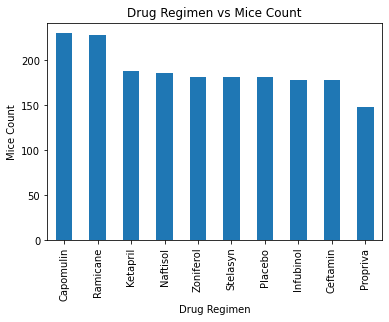

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Drug_Count_DF=rcd["Drug Regimen"].value_counts() #count of how many mice each drug is associated with
Drug_Count_DF.plot(kind="bar")
plt.title("Drug Regimen vs Mice Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")



Text(0, 0.5, 'Mice Count')

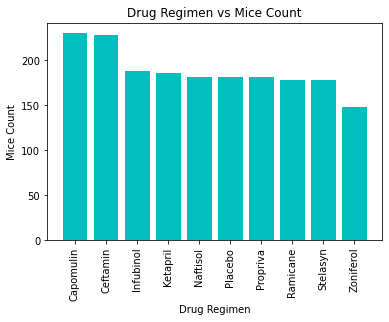

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bars = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148] #numbers taken from Drug_Count_DF above
x_axis = np.arange(len(bars))
plt.bar(x_axis, bars, color="c", alpha=1.0, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation = "vertical")
plt.title("Drug Regimen vs Mice Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

Text(0, 0.5, 'Sex')

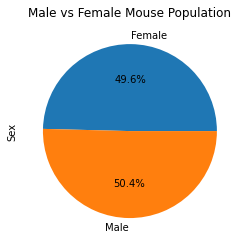

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#First we need to compare the count of female to male. Then plot that data
gendergroup = rcd.groupby(["Sex"]).nunique() 
df=gendergroup["Mouse ID"] #123 female and 125 male
df

#Plot
df.plot(kind="pie", autopct='%1.1f%%')
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')


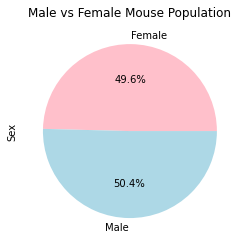

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female","Male"]
colors = ["pink", "lightblue"] 
plt.pie(df, labels=sex, colors=colors, autopct='%1.1f%%')
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

CRIC = rcd[rcd["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
CRIC #df organized by top 4 drug regimens

CRIC_MaxTpt= CRIC.groupby(["Mouse ID"])["Timepoint"].max()
CRIC_MaxTpt #Max timepoint for each mouse ID

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(CRIC, CRIC_MaxTpt, on = ["Timepoint", "Mouse ID"])
merge_df=merge_df[["Drug Regimen","Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
merge_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,45,22.050126
1,Capomulin,s185,45,23.343598
2,Capomulin,x401,45,28.484033
3,Capomulin,m601,45,28.430964
4,Ramicane,g791,45,29.128472
...,...,...,...,...
95,Ceftamin,x822,45,61.386660
96,Infubinol,y163,45,67.685569
97,Ceftamin,y769,45,68.594745
98,Ceftamin,y865,45,64.729837


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
Cap_Tumor = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
Cap_Tumor = Cap_Tumor["Tumor Volume (mm3)"]

Cquartiles = Cap_Tumor.quantile([.25,.5,.75])
Clowerq = Cquartiles[0.25]
Cupperq = Cquartiles[0.75]
Ciqr = Cupperq-Clowerq

#Ramicane
Ram_Tumor = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
Ram_Tumor = Ram_Tumor["Tumor Volume (mm3)"]

Rquartiles = Ram_Tumor.quantile([.25,.5,.75])
Rlowerq = Rquartiles[0.25]
Rupperq = Rquartiles[0.75]
Riqr = Rupperq-Rlowerq

#Infubinol
Inf_Tumor = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
Inf_Tumor = Inf_Tumor["Tumor Volume (mm3)"]

Iquartiles = Inf_Tumor.quantile([.25,.5,.75])
Ilowerq = Iquartiles[0.25]
Iupperq = Iquartiles[0.75]
Iiqr = Iupperq-Ilowerq

#Ceftamin
Cef_Tumor = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]
Cef_Tumor = Cef_Tumor["Tumor Volume (mm3)"]

CEquartiles = Cef_Tumor.quantile([.25,.5,.75])
CElowerq = CEquartiles[0.25]
CEupperq = CEquartiles[0.75]
CEiqr = CEupperq-CElowerq


# Locate the rows which contain mice on each drug and get the tumor volumes
#merge_df
    
# add subset  
Tumor_Vol_Data = [Cap_Tumor, Ram_Tumor, Inf_Tumor, Cef_Tumor]
TVD = Tumor_Vol_Data
        
# Determine outliers using upper and lower bounds
        
#Capomulin
Clower_bound = Clowerq - (1.5*Ciqr)
Cupper_bound = Cupperq + (1.5*Ciqr)
C_out = Cap_Tumor.loc[(Cap_Tumor < Clower_bound) | (Cap_Tumor > Cupper_bound)]
       
#Ramicane
Rlower_bound = Rlowerq - (1.5*Riqr)
Rupper_bound = Rupperq + (1.5*Riqr)    
R_out = Ram_Tumor.loc[(Ram_Tumor < Rlower_bound) | (Ram_Tumor > Rupper_bound)]

#Infubinol
Ilower_bound = Ilowerq - (1.5*Iiqr)
Iupper_bound = Iupperq + (1.5*Iiqr) 
I_out = Inf_Tumor.loc[(Inf_Tumor < Ilower_bound) | (Inf_Tumor > Iupper_bound)]

#Ceftamin
CElower_bound = CElowerq - (1.5*CEiqr)
CEupper_bound = CEupperq + (1.5*CEiqr)
CE_out = Cef_Tumor.loc[(Cef_Tumor < CElower_bound) | (Cef_Tumor > CEupper_bound)]

#print (C_out)
#print (R_out)
#print (I_out) #Infubinol is the only drug regimen with outliers
#print (CE_out)

print("The only outlier is for Infubinol")
print (I_out)

The only outlier is for Infubinol
58    36.321346
Name: Tumor Volume (mm3), dtype: float64


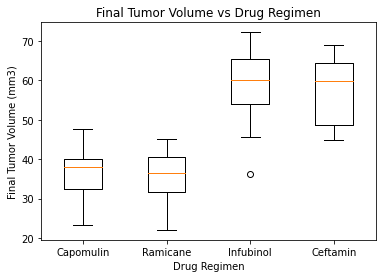

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final = merge_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume vs Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = "Capomulin"
labels[1] = "Ramicane"
labels[2] = "Infubinol"
labels[3] = "Ceftamin"
ax1.set_xticklabels(labels)
ax1.boxplot(TVD)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint vs Tumor Volume (mm3)')

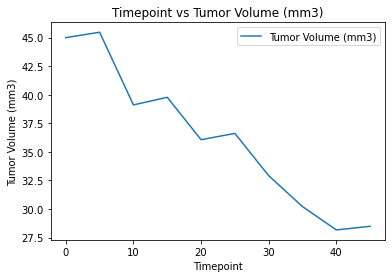

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Clean DF
TvT = rcd[rcd["Mouse ID"].isin(["x401"])]
TvTdf = TvT[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]] 
line_plot = TvTdf[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#line_plot #run this for DF for Mouse ID x401 

#Line Graph
lines = line_plot.plot.line(x="Timepoint")
lines.set_xlabel("Timepoint")
lines.set_ylabel("Tumor Volume (mm3)")
lines.set_title("Timepoint vs Tumor Volume (mm3)")

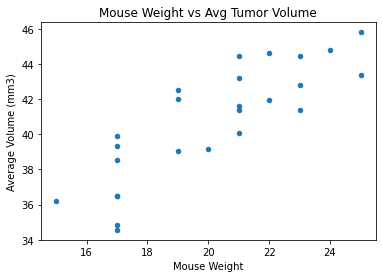

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Clean DF
x = rcd[rcd["Drug Regimen"].isin(["Capomulin"])]
x = x[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]

#Average the Tumor Volume
filt_AVolume = x.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#filt_AVolume

#Get the Weight
filt_Weight = x.groupby(["Mouse ID"])["Weight (g)"].last()
#filt_Weight

#Scatter Plot
plot_df=pd.DataFrame({"Mouse Weight":filt_Weight,"Average Volume (mm3)":filt_AVolume})
#plot_df

plot_df.plot.scatter(x="Mouse Weight", y="Average Volume (mm3)", title = "Mouse Weight vs Avg Tumor Volume")

#x #run this DF

## Correlation and Regression

The correlation between both factors is 0.84


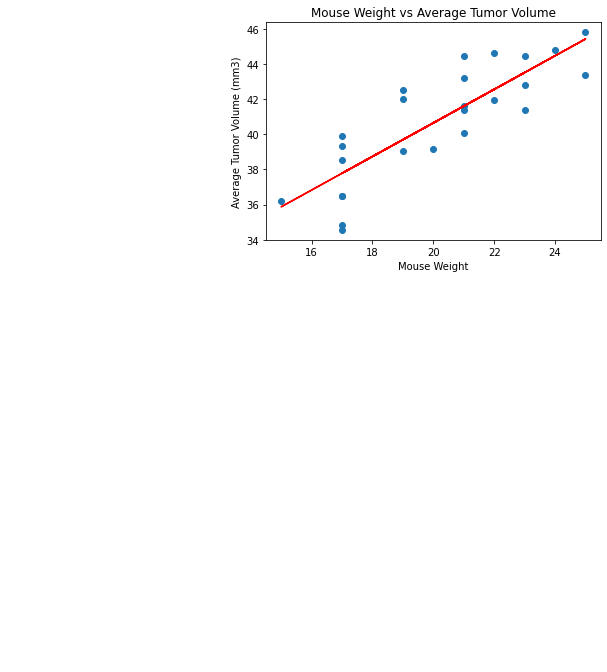

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#plot_df #reference data frame

#Grab our variables from the DF
Weight = plot_df.iloc[:,0]
Vol = plot_df.iloc[:,1]

#Correlation Coefficient
correlation = st.pearsonr(Weight,Vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#Linear Regression 
x_values = plot_df["Mouse Weight"]
y_values = plot_df["Average Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #import linregress from scipy, see imports
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.show()
